# <center> **QUE ES HADOOP** </center>

# Es un framework para **Almacenamiento y Procesamiento de lotes con altos volumenes de datos** de manera distribuida y ejecucion de tareas en paralelo

<div style="text-align:center">
    <img src="hadoop1-hadoop2.png">
</div>

# <center> CARACTERISTICAS HADOOP </center>
<div style="text-align:center">
    <img src="hadoop-caracteristicas.png">
</div>

<div style="text-align:center">
    <img src="caracteristicas-hadoop.png">
</div>

# <center> **COMPONENTES HADOOP** </center>
<div style="text-align:center">
    <img src="HadoopComponentes.png">
</div>

# <center> **HADOOP COMMON** </center>
<div style="text-align:center">
    <img src="commons.png">
</div>

## - Contiene los archivos y scripts Java Archive (JAR) necesarios para iniciar Hadoop.
## - Colección de utilidades y bibliotecas comunes que son necesarias para los otros módulos de Hadoop.
## - Proporciona código fuente y documentación. 
## - Cuenta con una sección de contribuciones que contienen multiples proyectos de la comunidad de Hadoop.

# <center> **HADOOP YARN** </center>
<div style="text-align:center">
    <img src="yarn-logo.png">
</div>

## **YARN** funciona a través de un **Resource Manager** que es uno por nodo y un **Node Manager** que se ejecuta en todos los nodos.

* **Resource Manager** este **corre en el master node o NameNode**. Administra los recursos utilizados en el clúster, **provee un endpoint a los clientes para hacer la solicitud de envio de Jobs** Hace seguimiento del heart beats del Node Manager.
    * **Scheduler**  este **decide cómo se asignan los recursos a varias tareas.** Programa los recursos a las **aplicaciones en ejecución en función de los requisitos, la capacidad y la cola**. **No garantiza reiniciar las tareas fallidas**.
    * **Application Manager** administra la ejecución de **Application Master en un clúster** y, en caso de falla del contenedor de Application Master, **ayuda a reiniciarlo**. Asimismo, tiene la responsabilidad de aceptar los Jobs enviados.

   
* **Node Manager** este **corre en el slave node**, Monitorea los **Containers** y Crea **Containers** basado en los requerimientos de la Task, es Responsable de la **ejecución de las Tasks en cada DataNode**. envia **heart beats al Resource Manager**

* **Containers** Conjunto de recursos como **RAM, CPU, GPU, Disco, Red** de un Nodo o **Host del Cluster**. Son programados por **Resource Manager** y monitoreados por **Node Manager**.

* **Application Master** Es **creado por un Job** y controla la monitorización y la **ejecución de las tareas usando el Container**, es el que **Negocia los recursos para el Job con el Resource Manager**. Gestiona el ciclo de vida de los **Jobs que se ejecutan en el clúster hasta que se completen**.

* **History Server** es el encargado de **Almacenar el historial de todos los Jobs**.

<div style="text-align:center">
    <img src="yarn.png">
</div>

# <center> HDFS **HADOOP DISTRIBUTE FILE SYSTEM** Y HCFS **HADOOP COMPATIBLE FILE SYSTEM** </center>
# Es un sistema de archivos distribuido que proporciona espacio de almacenamiento redundante para archivos de gran tamaño especialmente en el rango de terabytes a petabytes.
<div style="text-align:center">
    <img src="hdfs.png">
</div>

# <center> ARCHIVOS</center>

- Los Archivos que se guardan en el **HDFS son inmutables** y se pueden leer tantas veces como se quiera, por la inmutabilidad no se pueden modificar los archivos.
- Los archivos que se van a almacenar en el HDFS **se recomienda que sean de 128 Megas** o mas.

- Muchos **Archivos pequeños hacen ineficientes el procesamiento** y el almacenamiento, hay varias razones por las cuales se generan archivos de bajo peso como:
    * Los archivos pueden ser la pieza de un archivo lógico más grande. 
    * Algunos archivos no se pueden combinar en un archivo más grande y son esencialmente pequeños. aunque se comprima un set de imagenes en un archivo que ocupe las 128 megas recomendadas cuando se procesen estas imagenes, se hara de manera separada imagen por imagen, ya que donde cada imagen es un archivo distinto, haciendo ineficiente el proceso.
    

- **Efectos de los archivos pequeños**: 
    - HDFS no puede manejar de manera eficiente el almacenamiento de muchos archivos pequeños que son extremadamente pequeños que el tamaño del bloque. 
    - La lectura de archivos pequeños implica muchas búsquedas y muchos saltos entre nodos de datos, lo que a su vez es un procesamiento de datos ineficiente.
    - En la memoria de namenode, cada archivo, directorio y bloque en HDFS se representa como un objeto. Cada uno de estos objetos tiene un tamaño de 150 bytes.
    - Si consideramos 10 millones de archivos pequeños, cada uno de estos archivos usará un bloque separado. Eso provocará un uso de 3 gigas de memoria.
    - Con las limitaciones de hardware que tiene, escalar más allá de este nivel es un problema. 
    - Con muchos archivos, la memoria requerida para almacenar los metadatos es alta y no se puede escalar más allá de un límite.
    - En MapReduce, la tarea Map procesa un bloque de datos a la vez. 
    - Muchos archivos pequeños significan muchos bloques, lo que significa muchas tareas y mucha contabilidad por parte de Application Master.
    - Esto ralentizará el rendimiento general del clúster en comparación con el procesamiento de archivos grandes.

    **Alternativas**:

    **1\. Archivos Hadoop, HAR**:
     - Hadoop Archives o HAR es una instalación de archivo que empaqueta archivos en bloques HDFS de manera eficiente. No relacione los archivos .har con archivos comprimidos.
     - HAR se crea a partir de una colección de archivos y la herramienta de archivo (un comando simple) ejecutará un trabajo de MapReduce para procesar los archivos de entrada en paralelo y crear un archivo de archivos.
     - los pequeños archivos dentro del archivo .har serán procesados individualmente por mapeadores separados, lo cual es ineficiente.

    **2\. SequenceFile System**:
     * Use el nombre de cada archivo como clave y el contenido del cada archivo como valor.
     * Puede ser procesados en forma de Streaming (directamente o usando MapReduce) operando en SequenceFile
     * Se pueden dividir, por lo que MapReduce puede dividirlos en fragmentos y operar en cada fragmento de forma independiente.
     * Admiten compresión, a diferencia de los HAR. La compresión de bloques es la mejor opción en la mayoría de los casos, ya que comprime bloques de varios registros (en lugar de por registro).

    **3\. HBase si no es un problema la latencia**:
     - Si está produciendo muchos archivos pequeños, entonces, dependiendo del patrón de acceso, un tipo diferente de almacenamiento podría ser más apropiado.
     - Almacena datos en MapFiles (SequenceFiles indexados) y es una buena opción si necesita realizar análisis Streaming de estilo MapReduce con la búsqueda aleatoria ocasional.

# <center> DATAFRAME ejemplo </center>

In [1]:
#!pip install fastparquet
import pandas as pd
valores = {
    "Colores":["Amarillo","Azul","Rojo","Verde","Blanco"],
    "Frutas":["Manzana","Fresa","Kiwi","Guama","Mango"], 
    "Numeros":["Uno","dos","Tres","Cuatro","Cinco"],
    "Lenguajes":["Python","Java","Scala","C","C++"],
    "Continentes":["Africa","America","Asia","Europa","Ocenania"],
    "Deportes":["Futbol","Tenis","Patinaje","Natacion","Ciclismo"],
    "Redes":["Youtube","Linkedin","Twitter","Whatsapp","Facebook"],
    "Figuras":["Circulo","Cuadro","Triangulo","Rombo","Estrella"],
    "Planetas":["Mercurio","Venus","Tierra","Marte","jupyter"],
    "Ciencias":["Quimica","Fisica","Matematica","Medicina","Computacion"],
    "Sentidos":["Vista","Oido","Tacto","Gusto","Olfato"],
    "Escuderias":["Mercedes","Ferrarri","McLaren","BMW","Honda"],
    "Valores":[7,13,22,31,57]
}

pandas_filas = pd.DataFrame(valores)
pandas_filas

,Colores,Frutas,Numeros,Lenguajes,Continentes,Deportes,Redes,Figuras,Planetas,Ciencias,Sentidos,Escuderias,Valores
0,Amarillo,Manzana,Uno,Python,Africa,Futbol,Youtube,Circulo,Mercurio,Quimica,Vista,Mercedes,7
1,Azul,Fresa,dos,Java,America,Tenis,Linkedin,Cuadro,Venus,Fisica,Oido,Ferrarri,13
2,Rojo,Kiwi,Tres,Scala,Asia,Patinaje,Twitter,Triangulo,Tierra,Matematica,Tacto,McLaren,22
3,Verde,Guama,Cuatro,C,Europa,Natacion,Whatsapp,Rombo,Marte,Medicina,Gusto,BMW,31
4,Blanco,Mango,Cinco,C++,Ocenania,Ciclismo,Facebook,Estrella,jupyter,Computacion,Olfato,Honda,57


# <center> TRANSPONER EL DATAFRAME PARA VISUALIZARLO COMO COLUMNAS </center>

In [2]:
columnas = pandas_filas.T
columnas

,0,1,2,3,4
Colores,Amarillo,Azul,Rojo,Verde,Blanco
Frutas,Manzana,Fresa,Kiwi,Guama,Mango
Numeros,Uno,dos,Tres,Cuatro,Cinco
Lenguajes,Python,Java,Scala,C,C++
Continentes,Africa,America,Asia,Europa,Ocenania
Deportes,Futbol,Tenis,Patinaje,Natacion,Ciclismo
Redes,Youtube,Linkedin,Twitter,Whatsapp,Facebook
Figuras,Circulo,Cuadro,Triangulo,Rombo,Estrella
Planetas,Mercurio,Venus,Tierra,Marte,jupyter
Ciencias,Quimica,Fisica,Matematica,Medicina,Computacion


# <center> FUNCIONES GENERICAS </center>

In [3]:
def crear_directorio(ruta):
    import os
    
    # directorio declarado como base en la imagen docker
    directorio_base  = '/src/notebooks'
    os.chdir(directorio_base) 
    
    directory = f'{os.getcwd()}/{ruta}'
    message = ''
    
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        return f"Se Creo el nuevo Directorio {directory}"
    return f"Directorio {directory} ya estaba creado"

# <center> ALGORITMOS DE COMPRESION</center>

In [4]:
algoritmos = {
              'LZ4':['lz4','.lz4','SI','BAJO','RAPIDO','MUY RAPIDO','Parquet'],
              'Gzip':['gzip','.gz - .tgz','NO','MEDIO','MEDIO','MEDIO','Parquet'],
              'Snappy':['snappy','.snappy','NO','BAJO','RAPIDO','RAPIDO','Parquet, ORC'],              
              'Zlib':['zlib','.zlib','NO','tiene 10 niveles','depende del nivel de compresion','depende del nivel de compresion','ORC'],
              'LZO':['lzo','.lzo','NO','MEDIO','RAPIDO','RAPIDO',''],              
              'Bzip2':['bzip2','.bz2','SI','ALTO','LENTO','LENTO',''],
             }

indices = ['Codec','Extension','Divisible','Nivel de Compresion', 'Velocidad de Compresion', 'Velocidad de Descompresion','Archivos Compatibles']
compresion = pd.DataFrame(data=algoritmos, index=indices)
compresion2 = compresion.T
compresion2

,Codec,Extension,Divisible,Nivel de Compresion,Velocidad de Compresion,Velocidad de Descompresion,Archivos Compatibles
LZ4,lz4,.lz4,SI,BAJO,RAPIDO,MUY RAPIDO,Parquet
Gzip,gzip,.gz - .tgz,NO,MEDIO,MEDIO,MEDIO,Parquet
Snappy,snappy,.snappy,NO,BAJO,RAPIDO,RAPIDO,"Parquet, ORC"
Zlib,zlib,.zlib,NO,tiene 10 niveles,depende del nivel de compresion,depende del nivel de compresion,ORC
LZO,lzo,.lzo,NO,MEDIO,RAPIDO,RAPIDO,
Bzip2,bzip2,.bz2,SI,ALTO,LENTO,LENTO,


# <center> RESUMEN TIPOS DE ARCHIVOS Y USOS</center>

In [5]:
algoritmos = {
              'AVRO':['Binary','Big Data and Streaming','SI','SI','SI','OLTP','Mensajes Intercambiados Entre 2 o mas Servicios','Hadoop, Kafka, Druid','Intermedia','SI','Orientado A Filas','Write Heavy'],
              'Protocol Buffers':['Binary','RPC y Kubernetes','NO','SI','SI','OLTP','Mensajes Intercambiados Entre 2 o mas Servicios','Kafka','POCO EFICIENTE AL COMPRIMIR','NO','Orientado A Filas','Write Heavy'],
              'Sequence File':['Binary','Hadoop','SI','SI','SI','OLTP','Resuelve el problema de los archivos pequeños','Hadoop','Snappy','SI','Optimizado para Map-Reduce',''],
              'JSON':['No Binary','API and Web','SI','SI','SI','OLTP','Mensajes Intercambiados Entre Browsers o Herramientas','Browsers','','NO','Orientado A Filas',''],
              'XML':['No Binary','enterprise','SI','SI','NO','OLTP','Mensajes Intercambiados Entre Browsers o Herramientas','Browsers','','SI','Orientado A Filas',''],
              'TEXT FILES':['No Binary','Todos por Simplicidad','NO','SI','SI','OLTP','','','','SI','Orientado A Filas',''],
              'Parquet':['Binary','Big Data y BI','SI','SI','NO','OLAP','Mensajes Intercambiados Entre 2 o mas Servicios','Spark, Impala, Arrow, Drill','Alta, Snappy','SI','Orientado A Columnas','Read Heavy'],
              'ORC':['Binary','Big Data y BI','NO','SI','NO','OLAP','Mensajes Intercambiados Entre 2 o mas Servicios','Hive, Presto','Muy Alta, ZLIB','SI','Orientado A Columnas','Read Heavy']
             }

indices = ['Tipo','Ecosistemas','Evolucion Esquema','Streaming','Batch','OLAP/OLTP','Descripcion','Plataformas Compatibles','Compresion Recomendada', 'Divisivilidad', 'Almacenamiento','Tipo de Uso']
compresion = pd.DataFrame(data=algoritmos, index=indices)
compresion2 = compresion.T
compresion2

,Tipo,Ecosistemas,Evolucion Esquema,Streaming,Batch,OLAP/OLTP,Descripcion,Plataformas Compatibles,Compresion Recomendada,Divisivilidad,Almacenamiento,Tipo de Uso
AVRO,Binary,Big Data and Streaming,SI,SI,SI,OLTP,Mensajes Intercambiados Entre 2 o mas Servicios,"Hadoop, Kafka, Druid",Intermedia,SI,Orientado A Filas,Write Heavy
Protocol Buffers,Binary,RPC y Kubernetes,NO,SI,SI,OLTP,Mensajes Intercambiados Entre 2 o mas Servicios,Kafka,POCO EFICIENTE AL COMPRIMIR,NO,Orientado A Filas,Write Heavy
Sequence File,Binary,Hadoop,SI,SI,SI,OLTP,Resuelve el problema de los archivos pequeños,Hadoop,Snappy,SI,Optimizado para Map-Reduce,
JSON,No Binary,API and Web,SI,SI,SI,OLTP,Mensajes Intercambiados Entre Browsers o Herra...,Browsers,,NO,Orientado A Filas,
XML,No Binary,enterprise,SI,SI,NO,OLTP,Mensajes Intercambiados Entre Browsers o Herra...,Browsers,,SI,Orientado A Filas,
TEXT FILES,No Binary,Todos por Simplicidad,NO,SI,SI,OLTP,,,,SI,Orientado A Filas,
Parquet,Binary,Big Data y BI,SI,SI,NO,OLAP,Mensajes Intercambiados Entre 2 o mas Servicios,"Spark, Impala, Arrow, Drill","Alta, Snappy",SI,Orientado A Columnas,Read Heavy
ORC,Binary,Big Data y BI,NO,SI,NO,OLAP,Mensajes Intercambiados Entre 2 o mas Servicios,"Hive, Presto","Muy Alta, ZLIB",SI,Orientado A Columnas,Read Heavy


# <center> FORMATOS DE ARCHIVOS </center>
# <center> AVRO </center>
* Sistema de serialización y deserialización de datos.
* Formato binario compacto independiente del Lenguaje, se puede crear y administrar con Java, Python, C, C++, Ruby, JavaScript.
* Usa esquemas basados en JSON. 
* Utiliza llamadas a procedimientos remotos RPC para enviar datos, durante el intercambio de datos, se envia el esquema.
* Almacena la informacion por filas.
* Usado especialmente en streaming de eventos, para escritura de datos, entonces almacena y serializa datos de manera eficiente.
* Formato mas rapido y ocupa menos espacio lo que lo hace mas eficiente que JSON.
* Permite evolucion del esquema

<div style="text-align:center">
    <img src="avro-kafka.png">
</div>

In [6]:
directorio_base  = '/src/notebooks'
directorio_avro = '/archivos/avro/schema'
schema_avro = 'user.avsc'
avro_serializado = 'users.avro'

ubicacion_fichero = f'{directorio_avro}/{schema_avro}'
# crea la rura de acceso al archivo
crear_directorio(directorio_avro)
    
# genera el fichero con la informacion delesquema
def generar_esquema(directorio_base, ubicacion_fichero, informacion_esquema):
    
    import json
    
    directorio_base  = f'{directorio_base}/{ubicacion_fichero}'
    with open(directorio_base, 'w') as esquema:
        json.dump(informacion_esquema, esquema, indent=2, sort_keys=False)
    
# informacion para crear el esquema
esquema_avro = {
"namespace": "ejemplo.serializacion.avro",
 "type": "record",
 "name": "User",
 "fields": [
     {"name": "nombre", "type": "string"},
     {"name": "numero",  "type": ["int", "null"]},
     {"name": "color", "type": ["string", "null"]},
     {"name": "lenguaje", "type": ["string", "null"]}
 ]
}

generar_esquema(directorio_base, ubicacion_fichero, esquema_avro)

In [7]:
# https://json-schema.org/understanding-json-schema
# Instala la libreria AVRO
# !pip install avro
# todos los campos de un esquema avro son requeridos, si se quiere uno opcional se debe poner type null

# importa los modulos para lectura y escritura de datos, serializacion, deserializacion.
import avro.schema
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

# lee el esquemaen formato JSON que se va a utilizar para la serializacion de datos, lo lee en binario rb
schema = avro.schema.parse(open(f"{directorio_base}/{directorio_avro}/{schema_avro}", "rb").read())

# guarda la informacion serializada, lo escribe en binario wb
# El DataFileWriter necesita el archivo donde guardar, el serializador y el esquema para compara y validar los datos a guardar y escribir los campos apropiados. 
# DatumWriter, que es responsable de serializar realmente los elementos en el formato binario de Avro
with DataFileWriter(open(f"{directorio_base}/{directorio_avro}/{avro_serializado}", "wb"), DatumWriter(), schema) as writer:
    writer.append({"nombre": "Jorge", "numero": 256})
    writer.append({"numero": 31, "color": "Azul", "lenguaje":"Python","nombre": "Cardona"})
    writer.append({"nombre": "Ana", "numero": 2, "color": "Blanco",})
    writer.append({"nombre": "Cecilia", "numero": 25, "color": "Verde","lenguaje":"Java"})
    #writer.append({"numero": 23, "color": "Rosado","lenguaje":"C++"})
    #writer.append({"nombre": 21, "numero": 23, "color": "Rosado","lenguaje":"C++"})
    #writer.append({"nombre": "Gabriela", "numero": 23, "color": "Rosado","lenguaje":"C++","Habilidad":"Correr"})
    
# lee la informacion del archivo serializado, lo lee en binario rb
# DatumReader, que es responsable de deserializar realmente los elementos en el formato binario de Avro
with DataFileReader(open(f"{directorio_base}/{directorio_avro}/{avro_serializado}", "rb"), DatumReader()) as reader:
    for user in reader:
        print (user)

{'nombre': 'Jorge', 'numero': 256, 'color': None, 'lenguaje': None}
{'nombre': 'Cardona', 'numero': 31, 'color': 'Azul', 'lenguaje': 'Python'}
{'nombre': 'Ana', 'numero': 2, 'color': 'Blanco', 'lenguaje': None}
{'nombre': 'Cecilia', 'numero': 25, 'color': 'Verde', 'lenguaje': 'Java'}


# <center> USANDO PANDAS </center>

In [8]:
# pip install pandavro

directorio_base  = '/src/notebooks'
directorio_avro = '/archivos/avro/schema'
avro_serializado = 'users.avro'

ubicacion_fichero = f'{directorio_avro}/{schema_avro}'

# crea el archivo AVRO usando un DATAFRAME
def crear_avro_con_pandas(pandas_data_frame, directorio_archivo, nombre_del_archivo):
    
    import pandavro as pdx

    # crea el directorio donde se guardara el archivo
    crear_directorio(directorio_archivo)
    
    # crear archivo AVRO usando pandas
    pdx.to_avro(f"{directorio_base}/{directorio_archivo}/{nombre_del_archivo}", pandas_data_frame)
   
    print(f'Archivo AVRO {directorio_archivo}/{nombre_del_archivo} usando PANDAS creado Exitosamente')

# Lee un archivo parquet y lo retorna como un DATAFRAME 
def leer_avro_con_pandas(ubicacion_archivo):
    import pandavro as pdx

    return pdx.read_avro(f"{directorio_base}/{directorio_avro}/{avro_serializado}")


crear_avro_con_pandas(pandas_filas, directorio_avro, avro_serializado)

leer_avro_con_pandas(ubicacion_fichero)

Archivo AVRO /archivos/avro/schema/users.avro usando PANDAS creado Exitosamente


,Colores,Frutas,Numeros,Lenguajes,Continentes,Deportes,Redes,Figuras,Planetas,Ciencias,Sentidos,Escuderias,Valores
0,Amarillo,Manzana,Uno,Python,Africa,Futbol,Youtube,Circulo,Mercurio,Quimica,Vista,Mercedes,7
1,Azul,Fresa,dos,Java,America,Tenis,Linkedin,Cuadro,Venus,Fisica,Oido,Ferrarri,13
2,Rojo,Kiwi,Tres,Scala,Asia,Patinaje,Twitter,Triangulo,Tierra,Matematica,Tacto,McLaren,22
3,Verde,Guama,Cuatro,C,Europa,Natacion,Whatsapp,Rombo,Marte,Medicina,Gusto,BMW,31
4,Blanco,Mango,Cinco,C++,Ocenania,Ciclismo,Facebook,Estrella,jupyter,Computacion,Olfato,Honda,57


# <center> PARQUET </center>
* Formato de almacenamiento basado en columnas.
* Usado especialmente para realizar consultas analíticas y pocas escrituras.
* Contiene datos (de tipo tabla) en su interior, de forma similar a cuando hablamos del fichero tipo CSV.
* No es un fichero en texto plano (se representa de forma binaria). 
* Cuándo, en un fichero de tipo CSV, queremos leer solamente una columna. Tenemos irremediablemente que leer todas las filas de la tabla. Con Parquet, cada columna es accesible de forma independiente al resto.
* Formato de datos autodescriptivo que integra el esquema o la estructura dentro de los datos en sí.
* El mejor uso para almcenamiento son los Data Lakes.
* Diseñado para admitir esquemas de compresión y codificación muy eficientes.
* Se diseñaron teniendo en cuenta estructuras de datos anidadas complejas.

<div style="text-align:center">
    <img src="parquet.png">
</div>

# <center> FUNCIONES PARA CREAR Y LEER ARCHIVOS PARQUET CON **PANDAS**</center>

In [9]:
# cuenta con problemas de compatibilidad para ORC
#!pip install pyarrow

# crea el archivo parquet usando un DATAFRAME
def crear_parquet_con_pandas(pandas_data_frame, directorio_archivo, nombre_del_archivo):

    # crea el directorio donde se guardara el archivo
    crear_directorio(directorio_archivo)
    
    # crear archivo parquet desde pandas usando pandas
    pandas_data_frame.to_parquet(f'{directorio_archivo}/{nombre_del_archivo}',compression='gzip')
    print(f'Archivo parquet {directorio_archivo}/{nombre_del_archivo} usando PANDAS creado Exitosamente')

# Lee un archivo parquet y lo retorna en un DATAFRAME    
def leer_archivo_parquet_con_pandas_retornar_pandas(ubicacion_archivo_parquet):
    # leer un archivo parquet con pandas
    dataframe_archivo_parquet = pd.read_parquet(ubicacion_archivo_parquet)
    
    return dataframe_archivo_parquet


directorio_parquet = 'archivos/parquet'
archivo_parquet = 'dataframe.parquet.gzip'

# directorio donde se guarda el archivo parquet
ubicacion_archivo_parquet = f'{directorio_parquet}/{archivo_parquet}'

crear_parquet_con_pandas(pandas_filas, directorio_parquet, archivo_parquet)

leer_archivo_parquet_con_pandas_retornar_pandas(ubicacion_archivo_parquet)

Archivo parquet archivos/parquet/dataframe.parquet.gzip usando PANDAS creado Exitosamente


,Colores,Frutas,Numeros,Lenguajes,Continentes,Deportes,Redes,Figuras,Planetas,Ciencias,Sentidos,Escuderias,Valores
0,Amarillo,Manzana,Uno,Python,Africa,Futbol,Youtube,Circulo,Mercurio,Quimica,Vista,Mercedes,7
1,Azul,Fresa,dos,Java,America,Tenis,Linkedin,Cuadro,Venus,Fisica,Oido,Ferrarri,13
2,Rojo,Kiwi,Tres,Scala,Asia,Patinaje,Twitter,Triangulo,Tierra,Matematica,Tacto,McLaren,22
3,Verde,Guama,Cuatro,C,Europa,Natacion,Whatsapp,Rombo,Marte,Medicina,Gusto,BMW,31
4,Blanco,Mango,Cinco,C++,Ocenania,Ciclismo,Facebook,Estrella,jupyter,Computacion,Olfato,Honda,57


# <center> FUNCIONES PARA CREAR Y LEER ARCHIVOS PARQUET CON **PYARROW**</center>

In [10]:
def crear_parquet_con_pyarrow(pandas_data_frame, directorio_archivo, nombre_del_archivo):
    
    # crea el directorio donde se guardara el archivo
    crear_directorio(directorio_archivo)
    
    # caraga los modulos para el proceso de generacion del archivo
    import pyarrow.parquet as pq
    import pyarrow as pa
    
    # crear archivo parquet desde pandas usando pyarrow
    table = pa.Table.from_pandas(pandas_data_frame)
    pq.write_table(table, f'{directorio_archivo}/{nombre_del_archivo}')
    
    print(f'Archivo parquet {directorio_archivo}/{nombre_del_archivo} usando PYARROW creado Exitosamente')
    
    
def leer_archivo_parquet_con_pyarrow_retornar_pandas(ubicacion_archivo_parquet):
    import pyarrow.parquet as pq
    
    # leer un archivo parquet con pyarrow
    archivo_parquet = pq.read_table(ubicacion_archivo_parquet)

    print("Estructura del Archivo Parquet")
    print(archivo_parquet)
    
    # convertir pyarrow a pandas
    return archivo_parquet.to_pandas()

directorio_parquet = 'archivos/parquet'
archivo_parquet = 'dataframe.parquet'

# directorio donde se guarda el archivo parquet
ubicacion_archivo_parquet = f'{directorio_parquet}/{archivo_parquet}'

crear_parquet_con_pyarrow(pandas_filas, directorio_parquet, archivo_parquet)
leer_archivo_parquet_con_pyarrow_retornar_pandas(ubicacion_archivo_parquet)

Archivo parquet archivos/parquet/dataframe.parquet usando PYARROW creado Exitosamente
Estructura del Archivo Parquet
pyarrow.Table
Colores: string
Frutas: string
Numeros: string
Lenguajes: string
Continentes: string
Deportes: string
Redes: string
Figuras: string
Planetas: string
Ciencias: string
Sentidos: string
Escuderias: string
Valores: int64
----
Colores: [["Amarillo","Azul","Rojo","Verde","Blanco"]]
Frutas: [["Manzana","Fresa","Kiwi","Guama","Mango"]]
Numeros: [["Uno","dos","Tres","Cuatro","Cinco"]]
Lenguajes: [["Python","Java","Scala","C","C++"]]
Continentes: [["Africa","America","Asia","Europa","Ocenania"]]
Deportes: [["Futbol","Tenis","Patinaje","Natacion","Ciclismo"]]
Redes: [["Youtube","Linkedin","Twitter","Whatsapp","Facebook"]]
Figuras: [["Circulo","Cuadro","Triangulo","Rombo","Estrella"]]
Planetas: [["Mercurio","Venus","Tierra","Marte","jupyter"]]
Ciencias: [["Quimica","Fisica","Matematica","Medicina","Computacion"]]
...


,Colores,Frutas,Numeros,Lenguajes,Continentes,Deportes,Redes,Figuras,Planetas,Ciencias,Sentidos,Escuderias,Valores
0,Amarillo,Manzana,Uno,Python,Africa,Futbol,Youtube,Circulo,Mercurio,Quimica,Vista,Mercedes,7
1,Azul,Fresa,dos,Java,America,Tenis,Linkedin,Cuadro,Venus,Fisica,Oido,Ferrarri,13
2,Rojo,Kiwi,Tres,Scala,Asia,Patinaje,Twitter,Triangulo,Tierra,Matematica,Tacto,McLaren,22
3,Verde,Guama,Cuatro,C,Europa,Natacion,Whatsapp,Rombo,Marte,Medicina,Gusto,BMW,31
4,Blanco,Mango,Cinco,C++,Ocenania,Ciclismo,Facebook,Estrella,jupyter,Computacion,Olfato,Honda,57


# <center> ORC - OPTIMIZED ROW COLUMNAR</center>
* Formato de almacenamiento basado en columnas.
* Usado especialmente para realizar consultas analíticas y pocas escrituras.
* Contiene datos (de tipo tabla) en su interior, de forma similar a cuando hablamos del fichero tipo CSV.
* No es un fichero en texto plano (se representa de forma binaria). 
* Cuándo, en un fichero de tipo CSV, queremos leer solamente una columna. Tenemos irremediablemente que leer todas las filas de la tabla. Con Parquet, cada columna es accesible de forma independiente al resto.
* Formato de datos autodescriptivo que integra el esquema o la estructura dentro de los datos en sí.
* El mejor uso para almcenamiento son los Data Lakes.
* Diseñado para admitir esquemas de compresión y codificación muy eficientes.
* Se diseñaron teniendo en cuenta estructuras de datos anidadas complejas.

<div style="text-align:center">
    <img src="orc.png">
</div>

# <center> FUNCIONES PARA CREAR Y LEER ARCHIVOS **ORC** CON **PYARROW**</center>

In [11]:
directorio_orc = '/archivos/orc'
archivo_orc = 'dataframe.orc'
import os
# directorio donde se guarda el archivo parquet
ubicacion_archivo_orc = f'{directorio_orc}/{archivo_orc}'

def crear_orc_con_pyarrow(pandas_data_frame, directorio_archivo, nombre_del_archivo):
    
    import os
    # crea el directorio donde se guardara el archivo
    crear_directorio(directorio_archivo)
    
    # caraga los modulos para el proceso de generacion del archivo    
    import pyarrow as pa
    from pyarrow import orc
    
    # se debe declarar el directorio absoluto porque sino se va a la raiz
    ubicacion_archivo_orc = f'{os.getcwd()}/{directorio_orc}/{archivo_orc}'
    
    # crear archivo parquet desde pandas usando pyarrow
    table = pa.Table.from_pandas(pandas_data_frame)
    orc.write_table(table, ubicacion_archivo_orc)
    
    print(f'Archivo OCR {ubicacion_archivo_orc} usando PYARROW creado Exitosamente')
    
def leer_archivo_orc_con_pyarrow_retornar_pandas(ubicacion_archivo_orc):
    from pyarrow import orc
    
    # se debe declarar el directorio absoluto porque sino se va a la raiz
    ubicacion_archivo_orc = f'{os.getcwd()}/{ubicacion_archivo_orc}'
    
    # leer un archivo parquet con pyarrow
    archivo_orc = orc.read_table(ubicacion_archivo_orc)

    print("Estructura del Archivo ORC")
    print(archivo_orc)
    
    # convertir pyarrow a pandas
    return archivo_orc.to_pandas()

crear_orc_con_pyarrow(pandas_filas, directorio_orc, archivo_orc)
leer_archivo_orc_con_pyarrow_retornar_pandas(ubicacion_archivo_orc)

Archivo OCR /src/notebooks//archivos/orc/dataframe.orc usando PYARROW creado Exitosamente
Estructura del Archivo ORC
pyarrow.Table
Colores: string
Frutas: string
Numeros: string
Lenguajes: string
Continentes: string
Deportes: string
Redes: string
Figuras: string
Planetas: string
Ciencias: string
Sentidos: string
Escuderias: string
Valores: int64
----
Colores: [["Amarillo","Azul","Rojo","Verde","Blanco"]]
Frutas: [["Manzana","Fresa","Kiwi","Guama","Mango"]]
Numeros: [["Uno","dos","Tres","Cuatro","Cinco"]]
Lenguajes: [["Python","Java","Scala","C","C++"]]
Continentes: [["Africa","America","Asia","Europa","Ocenania"]]
Deportes: [["Futbol","Tenis","Patinaje","Natacion","Ciclismo"]]
Redes: [["Youtube","Linkedin","Twitter","Whatsapp","Facebook"]]
Figuras: [["Circulo","Cuadro","Triangulo","Rombo","Estrella"]]
Planetas: [["Mercurio","Venus","Tierra","Marte","jupyter"]]
Ciencias: [["Quimica","Fisica","Matematica","Medicina","Computacion"]]
...


,Colores,Frutas,Numeros,Lenguajes,Continentes,Deportes,Redes,Figuras,Planetas,Ciencias,Sentidos,Escuderias,Valores
0,Amarillo,Manzana,Uno,Python,Africa,Futbol,Youtube,Circulo,Mercurio,Quimica,Vista,Mercedes,7
1,Azul,Fresa,dos,Java,America,Tenis,Linkedin,Cuadro,Venus,Fisica,Oido,Ferrarri,13
2,Rojo,Kiwi,Tres,Scala,Asia,Patinaje,Twitter,Triangulo,Tierra,Matematica,Tacto,McLaren,22
3,Verde,Guama,Cuatro,C,Europa,Natacion,Whatsapp,Rombo,Marte,Medicina,Gusto,BMW,31
4,Blanco,Mango,Cinco,C++,Ocenania,Ciclismo,Facebook,Estrella,jupyter,Computacion,Olfato,Honda,57


# <center> FUNCIONES PARA LEER Y ESCRIBIR ARCHIVOS **ORC** CON **PANDAS**</center>

In [ ]:
import pandas as pd

directorio_orc = '/archivos/orc'
archivo_orc = 'dataframe.orc'
import os
# directorio donde se guarda el archivo parquet
ubicacion_archivo_orc = f'{directorio_orc}/{archivo_orc}'

# DISPONIBLE EN PANDAS 1.5.0
# crea el archivo ORC usando un DATAFRAME   
def crear_archivo_orc_con_pandas(pandas_data_frame, directorio_archivo, nombre_del_archivo):

    # crea el directorio donde se guardara el archivo
    crear_directorio(directorio_archivo)
    
    # crear archivo parquet desde pandas usando pandas
    pandas_data_frame.to_orc(f'{directorio_archivo}/{nombre_del_archivo}')
    print(f'Archivo ORC {directorio_archivo}/{nombre_del_archivo} usando PANDAS creado Exitosamente')
    

leer_archivo_orc_con_pyarrow_retornar_pandas(ubicacion_archivo_orc)
def leer_archivo_orc_con_pyarrow_retornar_pandas(ubicacion_archivo):

    # se debe declarar el directorio absoluto porque sino se va a la raiz
    ubicacion_archivo_orc = f'{os.getcwd()}/{ubicacion_archivo}'
    
    return pd.read_orc(ubicacion_archivo_orc)

leer_archivo_orc_con_pyarrow_retornar_pandas(ubicacion_archivo_orc)

# <center> COMPONENTES **HDFS**</center>

* **Namenode** controla el funcionamiento de los trabajos de datos.
* **Secundary Namenode** Asume la responsabilidad de fusionar los registros de edición con fsimage del namenode. Es Como un LogShipping cronometrado.
* **StandBy Namenode** Releva al namenode cuando este falla. Es como Streaming Replication con failover integrado.


* **DataNode** escribe datos en bloques en el almacenamiento local. Y replica bloques de datos a otros nodos de datos. Los DataNodes también son conscientes de los racks. No desearía replicar todos sus datos en el mismo bastidor de servidores, ya que una interrupción podría provocar la pérdida de todos sus datos.
* **JobTracker** envía trabajos de MapReduce a los nodos del clúster.
* **TaskTracker** acepta tareas del Job Tracker.
* **Client Application** este es cualquier programa que haya escrito o algún otro cliente como Apache Pig. Apache Pig es un shell fácil de usar que toma comandos similares a SQL y los traduce a programas Java MapReduce y los ejecuta en Hadoop.
- Application Master : ejecuta comandos de shell en un contenedor según lo indique Yarn.

<div style="text-align:center">
    <img src="hdfsarchitecture.png">
</div>

# <center> PROCESO **HDFS**</center>
<div style="text-align:center">
    <img src="HDFS_PROCESS.png">
</div>

<div style="text-align:center">
    <img src="cluster.png">
</div>

<div style="text-align:center">
    <img src="HadoopVentajas.png">
</div>

# <center> **MAP-REDUCE**</center>
<div style="text-align:center">
    <img src="MapReduce.png">
</div>
- Secondary Sort : Ordena los valores de la fase de Mapping antes de entregarsela al reductor de manera ascendente o descendente, en los casos que sean necesarios por ejemplo para una serie de tiempo.
- Join: Son usados para unir dos o más conjuntos de datos en función de alguna columna.
    - Map Side Join:
        - la operación de Join se realiza en la fase Map.
        - Se usa cuando un conjunto de datos es grande y el otro conjunto de datos es pequeño.
        - Ordenado por la misma clave.
        - Igual número de particiones.
        - Todos los registros de la misma clave deben estar en la misma partición.
    - Reduce Side Join:
        - la operación de Join se realiza en la fase Reduce.
        - Se usa cuando ambos conjunto de datos son grandes.
        - Mucho más flexible de implementar.
        - Tiene que haber WritableComparable personalizado con la función necesaria anulada.
        - Necesitamos un particionador personalizado.
        - Se requiere un comparador de grupo personalizado.
    
**Si tiene experiencia en SQL, no necesita preocuparse por escribir el código MapReduce Java para realizar una operación de unión. Puede utilizar Hive como alternativa.**
    
- Chained Mappers: permite usar múltiples clases de Mapper dentro de una sola tarea de Map.
- Chained Reducer permite encadenar varias clases de Mapper después de un Reducer dentro de la tarea Reducer.
- Bloom Filter
- In memory Mapper/Reducer side join

Partitioning
Bucketing
Sharding
  

# <center>FASES DEL PARADIGMA **MAP-REDUCE**
<img src="MapReduce-fases.png">

# <center> DEFINE LOS DATOS CON QUE SE VA A GENERAR LA INFORMACION DE ENTRADA

In [ ]:
import random
valores = ['CERO','UNO','DOS','TRES','CUATRO','CINCO','SEIS','SIETE','OCHO','NUEVE','DIEZ','ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE','TEN']
valores = ['CERO','UNO','DOS','TRES','CUATRO','CINCO','SEIS','SIETE','OCHO','NUEVE','DIEZ']

caracter_separador = ' @'
valores

# <center> GENERA LOS DATOS A PROCESAR **INPUT**
<img src="MapReduce-fases.png">

In [ ]:
# retorna una lista con valores
def generar_valores(limite_inferior:int = 2, limite_superior:int = 10,caracter_separador:str = caracter_separador) -> list:
    return [random.choice(valores) for valor in range(random.randint(limite_inferior, limite_superior))]

# retorna una cadena de valores con la informacion a particionar
def generar_archivo_de_datos(lista_valores_entrada:list, cantidad_de_muestras:int = 100)-> str:

  # recupera cada lista generada la convierte a cadena y le adiciona un caracter para usarlo como separador
  texto = [' '.join(generar_valores()) + caracter_separador for limite_listas in range(cantidad_de_muestras)]

  # une el contenido de las listas en una sola cadena
  return ''.join(texto)

archivo_de_datos = generar_archivo_de_datos(generar_valores())
archivo_de_datos

# <center> DIVIDE LOS DATOS A PROCESAR BASADO EN EL CARACTER SEPARADOR **@** **SPLITTING**
<img src="MapReduce-fases.png">

In [ ]:
# divide el archivo en listas
def splitting(arhivo_de_datos) -> list:
  # se pone [:-1] para que no genere una cadena vacia al final
  return arhivo_de_datos.split(caracter_separador)[:-1]

splitting_text = splitting(archivo_de_datos)
splitting_text

# <center> CREA LA INFORMACION DE LOS REGISTROS DEL **RECORDREADER** PARA QUE SEAN USADOS POR EL **MAPPER**
<img src="MapReduce-fases.png">

In [ ]:
def record_reader(input_file):
    record_file = []
    inicio = 0
    for record in input_file:
        
        record_file.append((inicio, record))
        inicio += len(record)
    
    return record_file
        
record_reader_file = record_reader(splitting_text)
record_reader_file

# <center> EJECUTA EL CODIGO DE MAPEO DE LOS DATOS **MAPPING**
<img src="MapReduce-fases.png">

In [ ]:
def lista_a_lista_de_diccionarios(lista):
    return [{str(llave):1} for llave in lista]

# divide cada palabra 1 a 1 en cada splitting text
def mapping(record_reader_file):
    mapeo = []
    
    for record_reader in record_reader_file:
        lista_cadena = record_reader[1].split()
        mapeo.append(lista_a_lista_de_diccionarios(lista_cadena))
        
    return mapeo

lista_mapping = mapping(record_reader_file)
print(lista_mapping)

# <center> COMBINA LOS DATOS DE LAS CLAVES DEL MISMO BLOQUE DE MAPEO **COMBINER**
<img src="MapReduce-fases.png">

In [ ]:
def unir_claves(lista):
    return {list(clave.keys())[0]:lista.count(clave) for clave in lista}

# junta las claves (las une) de cada particion del mapper
def combiner(lista_mapping):
  
  return [unir_claves(lista) for lista in lista_mapping]

combiner_values = combiner(lista_mapping)
print(combiner_values)

# <center> CREA PARTICIONES USANDO EN ESTE CASO COMO BASE DE PARTICION LOS NOMBRES DE LAS CLAVES **PARTITIONER**
<img src="MapReduce-fases.png">

In [ ]:
# divide cada diccionario de un combiner y genera una lista de diccionarios separados
def generar_diccionarios(lista:list):
    return [{key:value} for key,value in lista.items()]

# genera particiones por cada clave basado en el nombre de la clave
def generar_lista_de_diccionarios(combiner_values):
    particion = list()
    
    for particion_valores in combiner_values:
        particion.extend(generar_diccionarios(particion_valores))
    
    return particion
  
# particionado para este ejemplo por clave del diccionarario
def particionar(combiner_values):
    valores_lista_de_diccionarios = generar_lista_de_diccionarios(combiner_values)
    particion = dict()
    for diccionario in valores_lista_de_diccionarios:
        llave = list(diccionario.keys())[0]
        
        if llave in particion:
            valor = particion.get(llave)
            valor.append(diccionario)
            particion[llave] = valor
        else:
            particion[llave] = [diccionario]
            
    return particion

claves_particionadas = particionar(combiner_values)
print(claves_particionadas)

# <center> AGRUPA LOS DATOS Y LOS ORDENA CREANDO UNA LISTA CON CADA VALOR PARA CADA CLAVE **SHUFFLE AND SORT**
<img src="MapReduce-fases.png">

In [ ]:
def shuffle_and_short(claves_particionadas):
    
    particiones_agrupadas = dict()
    
    for llave in claves_particionadas:
        particiones_agrupadas[llave] = [list(valor.values())[0] for valor in claves_particionadas.get(llave)]
        
    return particiones_agrupadas
  

shuffle_and_short_ordenados = shuffle_and_short(claves_particionadas)

print(shuffle_and_short_ordenados)

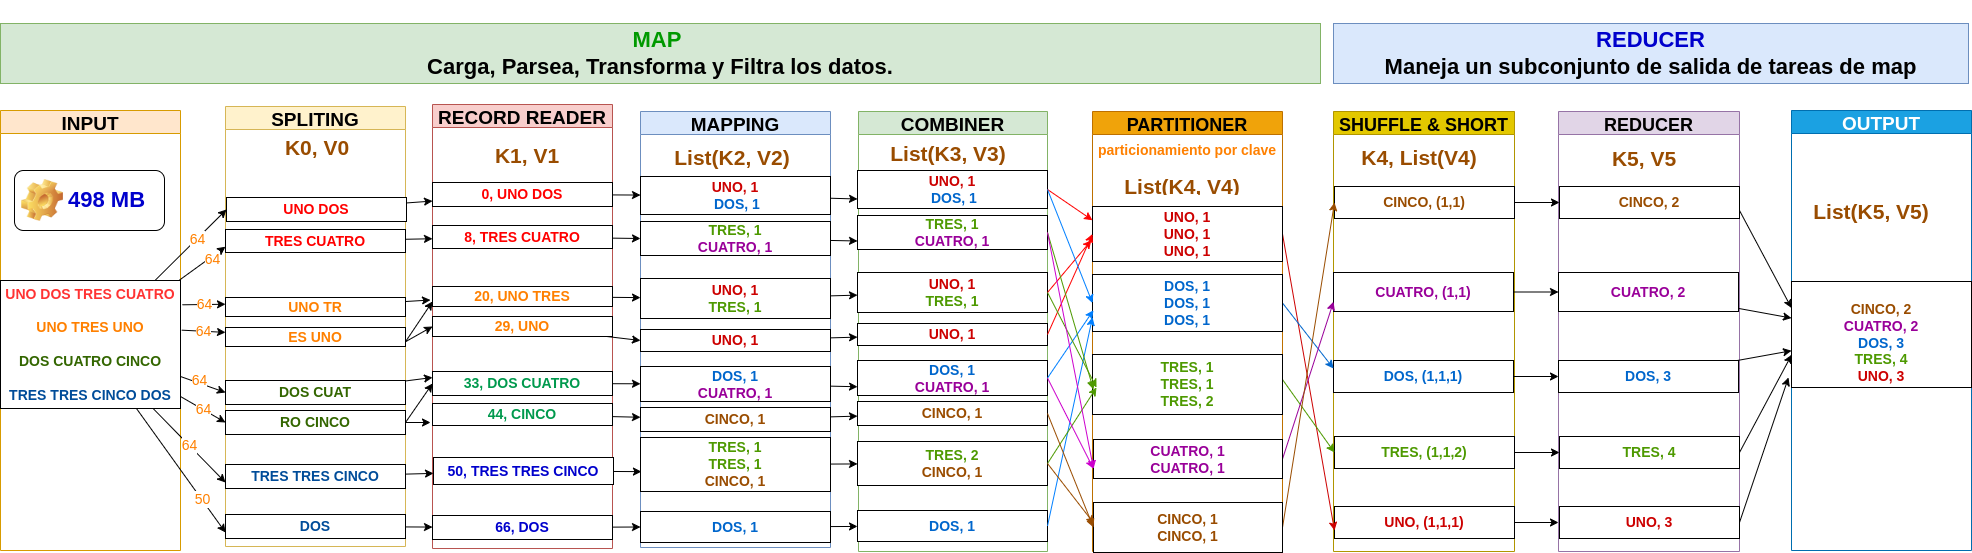# <center> EJECUTA EL ALGORITMO DE REDUCCION PARA CADA CLAVE, EN ESTE CASO LOS SUMA **REDUCER**
<img src="MapReduce-fases.png">

In [ ]:
def reducer(shuffle_and_short_ordenados):
    valores_reducidos = dict()
    
    for llave in shuffle_and_short_ordenados:
        
        valores_reducidos[llave] = sum(shuffle_and_short_ordenados.get(llave))
        
    return valores_reducidos

datos_reducer = reducer(shuffle_and_short_ordenados)
datos_reducer

# <center> GENERA EL ARCHIVO DE SALIDA CON LOS DATOS FINALES **OUTPUT**
<img src="MapReduce-fases.png">

In [ ]:
import pandas as pd

def output_dataframe(datos_reducer):

  # crea los valores de las keys en tipo lista para que se puedan adicionar al dataframe sin problemas
  datos_pandas = {key:[value] for key, value in datos_reducer.items()}
  
  return pd.DataFrame(datos_pandas)

output_dataframe(datos_reducer)

# <center> DIFERENCIAS HADOOP 2 VS HADOOP 3</center>
<div style="text-align:center">
    <img src="hadoop2vshadoop3.png">
</div>.

# <center> DEMO CLUSTER HADOOP</center>

In [ ]:
import os

def ejecutar_comandos_bash(comando):
    
    os.system(comando)
    
    print(f'Ejecutado {comando} Satisfactoriamente') 

In [ ]:
comandos_iniciar = [
            'docker network create --driver=bridge hadoop-network',
            'docker run --rm -itd --net=hadoop-network --name hadoop-slave1 --hostname hadoop-slave1 jorgecardona/hadoop-2.7.7-java-8-cluster-datanode:v1',
            'docker run --rm -itd --net=hadoop-network --name hadoop-slave2 --hostname hadoop-slave2 jorgecardona/hadoop-2.7.7-java-8-cluster-datanode:v1',
            #'docker run --rm -itd --net=hadoop-network --name hadoop-slave3 --hostname hadoop-slave3 jorgecardona/hadoop-2.7.7-java-8-cluster-datanode:v1',
            #'docker run --rm -itd --net=hadoop-network --name hadoop-slave4 --hostname hadoop-slave4 jorgecardona/hadoop-2.7.7-java-8-cluster-datanode:v1',
            #'docker run --rm -itd --net=hadoop-network --name hadoop-slave5 --hostname hadoop-slave5 jorgecardona/hadoop-2.7.7-java-8-cluster-datanode:v1',
            #'docker run --rm -itd --net=hadoop-network -p 50070:50070  -p 8088:8088  -p 18080:18080  --name hadoop-master --hostname hadoop-master -v $PWD/data:/data jorgecardona/spark-2.4.8-hadoop-2.7-java-8-cluster-namenode:v1'
            'docker run --rm -itd --net=hadoop-network -p 50070:50070  -p 8088:8088  -p 18080:18080  --name hadoop-master --hostname hadoop-master jorgecardona/spark-2.4.8-hadoop-2.7-java-8-cluster-namenode:v1'
]

comandos_detener = ['docker stop hadoop-master','docker stop hadoop-slave1','docker stop hadoop-slave2','docker stop hadoop-slave3','docker stop hadoop-slave4','docker stop hadoop-slave5', 'docker network rm hadoop-network']

# INICIAR EL CLUSTER HADOOP CON SPARK

In [ ]:
for ejecutar_comando in comandos_iniciar:
    ejecutar_comandos_bash(ejecutar_comando)   

# ACCESO A LOS RECURSOS - esperar 3 minutos mientras hace las tareas e inician las interfaces
## **Hadoop** 
### http://localhost:50070
### http://localhost:8088

## **Spark** 
### http://localhost:18080

# DETENER EL CLUSTER HADOOP Y SPARK

In [ ]:
for ejecutar_comando in comandos_detener:
    ejecutar_comandos_bash(ejecutar_comando)

# <center> HADOOP STACK
<img src="HadoopStack.png">